In [61]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets



In [62]:


train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()


model_k2 = CollabFilterOneVectorPerItem(
    n_epochs=50, batch_size=1000, step_size=0.5,
    n_factors=2, alpha=0.0)
model_k10 = CollabFilterOneVectorPerItem(
    n_epochs=50, batch_size=1000, step_size=0.5,
    n_factors=10, alpha=0.0)
model_k50 = CollabFilterOneVectorPerItem(
    n_epochs=50, batch_size=1000, step_size=0.5,
    n_factors=50, alpha=0.0)


model_k2.init_parameter_dict(n_users, n_items, train_tuple)
model_k10.init_parameter_dict(n_users, n_items, train_tuple)
model_k50.init_parameter_dict(n_users, n_items, train_tuple)

model_k2.fit(train_tuple, valid_tuple)
model_k10.fit(train_tuple, valid_tuple)
model_k50.fit(train_tuple, valid_tuple)

model_k2_rmse_train = model_k2.trace_rmse_train
model_k2_rmse_valid = model_k2.trace_rmse_valid

model_k10_rmse_train = model_k10.trace_rmse_train
model_k10_rmse_valid = model_k10.trace_rmse_valid

model_k50_rmse_train = model_k50.trace_rmse_train
model_k50_rmse_valid = model_k50.trace_rmse_valid


n_users 943
n_items 1682
n_users 943
n_items 1682
n_users 943
n_items 1682
epoch       0.000 | loss_total     1.56000 | tr RMSE     1.24455 | va RMSE     1.24854 | grad_wrt_mu     0.95200 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     1.22449 | tr RMSE     1.12609 | va RMSE     1.12448 | grad_wrt_mu     0.14235 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.26688 | tr RMSE     1.12422 | va RMSE     1.12178 | grad_wrt_mu     0.14276 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.29049 | tr RMSE     1.12691 | va RMSE     1.12366 | grad_wrt_mu     0.18513 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
e

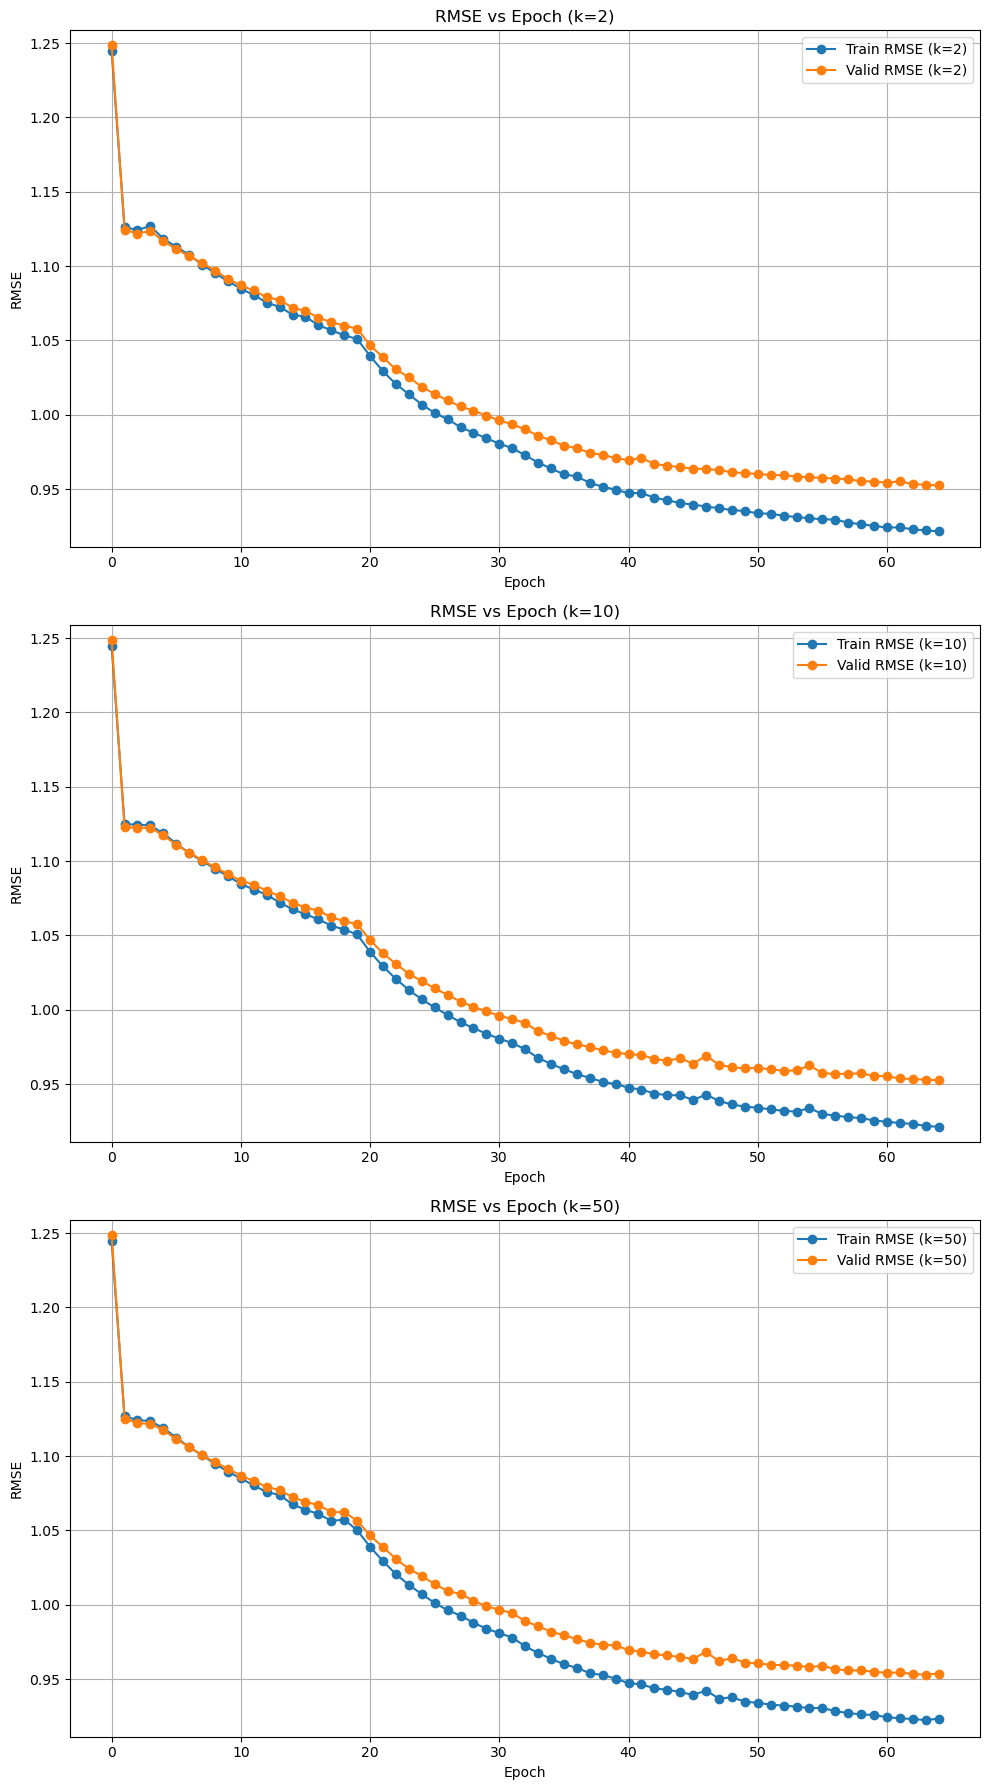

In [65]:
import matplotlib.pyplot as plt
# Determine the global min and max RMSE values for consistent y-axis


padding = 0.01
y_min = min(min(model_k2_rmse_train), min(model_k2_rmse_valid),
            min(model_k10_rmse_train), min(model_k10_rmse_valid),
            min(model_k50_rmse_train), min(model_k50_rmse_valid)) - padding
y_max = max(max(model_k2_rmse_train), max(model_k2_rmse_valid),
            max(model_k10_rmse_train), max(model_k10_rmse_valid),
            max(model_k50_rmse_train), max(model_k50_rmse_valid)) + padding

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))


axes[0].plot(model_k2_rmse_train, label='Train RMSE (k=2)', marker='o')
axes[0].plot(model_k2_rmse_valid, label='Valid RMSE (k=2)', marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE vs Epoch (k=2)')
axes[0].set_ylim(y_min, y_max)
axes[0].legend()
axes[0].grid()

axes[1].plot(model_k10_rmse_train, label='Train RMSE (k=10)', marker='o')
axes[1].plot(model_k10_rmse_valid, label='Valid RMSE (k=10)', marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE vs Epoch (k=10)')
axes[1].set_ylim(y_min, y_max)
axes[1].legend()
axes[1].grid()

# Plot for model_k50
axes[2].plot(model_k50_rmse_train, label='Train RMSE (k=50)', marker='o')
axes[2].plot(model_k50_rmse_valid, label='Valid RMSE (k=50)', marker='o')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('RMSE')
axes[2].set_title('RMSE vs Epoch (k=50)')
axes[2].set_ylim(y_min, y_max)
axes[2].legend()
axes[2].grid()

# Adjust layout
plt.tight_layout()
plt.show()




In [64]:
model_k2.predict(test_tuple[0], test_tuple[1], **model_k2.param_dict)

array([2.96469893, 4.00798039, 3.79938184, ..., 4.27346964, 4.35002674,
       3.70164225])